### <center>_Boussiala Mohamed Nachid_ 

__<center>boussiala.nachid@univ-alger3.dz__

# Introduction

One of the basic processes in time series analysis is the "stationary" stochastic process. A **stationary process** is the process whose mean and variance do not change over time and the covariance between two periods depends on the distance between the periods, not the period under consideration.

To explain, let's define a $Y_{t}$ series as follows.

$$
\begin{aligned}
E\left(Y_{t}\right) &=\mu \\
\operatorname{var}\left(Y_{t}\right) &=\gamma_{0} \\
\operatorname{cov}\left(Y_{t}, Y_{t+k}\right) &=\gamma_{k}
\end{aligned}
$$

Now suppose we have shifted the starting point from $t$ to $t + k$. If $Y$ is stable, the mean, variance and covariance of the $Y_{t}$ and $Y_{t + k}$ series must be the same.

When $k = 0$, $\operatorname{cov}\left(Y_{t}, Y_{t+0}\right)=\operatorname{var}\left(Y_{t}\right)=\sigma^{2}$

A stationary time series according to our definition; It is a series whose mean, variance and covariance are independent of time. Such a series shows constant amplitude oscillations around its mean. This feature is also called "return to mean". Such stationary series can appear with different names in the literature:

* weakly stationary,
* covariance stationary,
* second-order stationary.

# Difference Stationary Process vs. Trend Stationary Process

Processes that can be made statioanry by taking their differences are called **difference-stationary processes(DSP)**. Series that are stationary when the first difference is taken are called first-order integrated series and denoted by $ I (1) $. Similarly, series that become stationary when the second difference is taken are called $ I (2) $ series. RW and RWD processes are $ I (1) $ processes. The first difference of these series is $ I (0) $, that is, it is stationary:

$$
\Delta y_{t}=\phi_{0}+\epsilon_{t} \sim I(0)
$$

where $\epsilon_{t} \sim w \cdot n \cdot\left(0, \sigma^{2}\right)$.

The processes that fluctuate around a trend and tend to return to the trend over time are called **trend-stationary process (TSP)**. 

Suppose a deterministic trend model:

$$
x_{t}=\beta_{0}+\beta_{1} t+\epsilon_{t}, \quad \epsilon_{t} \sim w n\left(0, \sigma^{2}\right)
$$

The mean and variance functions of this process, respectively

$$
\begin{array}{c}
\mu_{t}=\mathrm{E}\left(x_{t}\right)=\beta_{0}+\beta_{1} t \\
\gamma_{0 t}=\operatorname{Var}\left(\epsilon_{t}\right)=\sigma^{2}
\end{array}
$$

The mean of the series changes with $ t $. Therefore, the series is not stationary. However, when the trend is purged, it becomes stationary. In other words, a serial trend is stationary around:

$$
x_{t}-\beta_{1} t=\beta_{0}+\epsilon_{t} \sim I(0)
$$

# Regression Analysis with Non-Stationary Series

In order for the standard asymptotic theory to be valid in regression analysis with time series, all variables must be $\mathrm {I}(0),$ ie stationary.

The use of difference stationary time series in regression can lead to the problem of **spurious regression**.

In case all variables are I(1), it is checked whether there is a long-term cointegration relationship between the series.

If there is cointegration, the appropriate regression model also includes deviations from the long-term cointegration relationship. (Error correction model - Error Correction Model ECM). Otherwise, regression should be established by taking the first differences of the series.

# Statistical Tests to Detect Non-Stationarity: Unit-Root Tests

In practice, it is extremely important to determine whether a time series is stationary (TSP or DSP).

For this purpose, various unit root and stationarity tests have been developed. The most commonly used of these tests are: ADF test, PP test, DF-GLS test, ERS Point-Optimal test, NP test, KPSS test.

### <center> Unit Root Testing

In [1]:
import warnings

warnings.simplefilter("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

Most examples will make use of the Default premium, which is the difference between the yields of BAA and AAA rated corporate bonds. The data is downloaded from FRED using pandas.

In [2]:
import arch.data.default
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

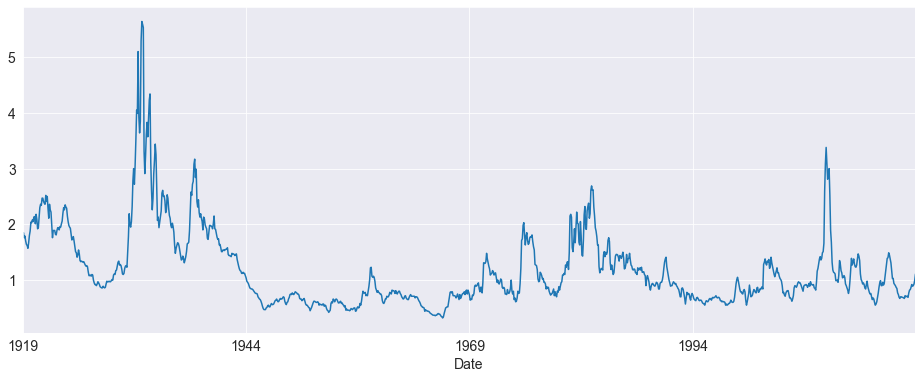

In [3]:
default_data = arch.data.default.load()
default = default_data.BAA.copy()
default.name = "default"
default = default - default_data.AAA.values
fig = default.plot()

The Default premium is clearly highly persistent. A simple check of the autocorrelations confirms this.

## Dickey-Fuller Unit-Root Test
Dickey-Fuller unit root tests (DF) use the standard regression approach to test this null hypothesis (Dickey & Fuller (1979) and Dickey & Fuller (1981)). Suppose the following regression:

$$
\Delta y_{t}=\alpha y_{t-1}+\varepsilon_{t}
$$

Where $\Delta y_{t} = y_{t}-y_{t-1}$ and $\alpha = \phi-1$. Null and alternative hypotheses:

$$
\begin{array}{ll}
H_{0}: \alpha=0 & (\phi=1) \\
H_{1}: \alpha<0 & (\phi<1)
\end{array}
$$

The alternative hypothesis is one-sided (left tail test). $H_{1}: \alpha > 0, (\rho > 1)$ is not very realistic for other alternative economic time series, so a right tail test is not performed. The DF test is equal to the standard t ratio, defined as the ratio of the OLS coefficient to the standard error:

$$
\tau=\frac{\hat{\alpha}}{\text { s.e. }(\hat{\alpha})}
$$

This statistic does not fit the standard t distribution under the null hypothesis. Dickey and Fuller (1979) calculated the critical values by describing the asymptotic distribution of this test statistic. There is no clear form of asymptotic distribution. Therefore, critical values must be calculated with simulations.

To calculate unit-root test statistic for DF(1979) test, three different equations are used:

$$
\text{without constant and trend}: \Delta y_{t}=\alpha y_{t-1}+\varepsilon_{t}
$$

$$
\text{with constant}: \Delta y_{t}=\beta_{0} + \alpha y_{t-1}+\varepsilon_{t}
$$

$$
\text{with constant and trend}: \Delta y_{t}=\beta_{0} + \beta_{1} t + \alpha y_{t-1}+\varepsilon_{t}
$$

## Augmented Dickey-Fuller Unit Root Test
It should be noted that in Dickey-Fuller models the error term follows the iid white noise process. If the error term contains serial autocorrelation, the test statistic may reject the null hypothesis more than it should. In addition, the power of the test may be reduced. In eliminating the autocorrelation in the error term, Said and Dickey (1984) suggested adding the lags of the first difference of the $y_{t}$ series to the test regression:

$$\Delta y_{t}=\boldsymbol{\beta}^{\top} \boldsymbol{d}_{t}+\alpha y_{t-1}+\sum_{j=1}^{k} \alpha_{j} \Delta y_{t-j}+\varepsilon_{t}$$

This version of the test is known in the literature as the **augmented Dickey-Fuller (ADF) test**. Calculation of test statistics, decision rule and asymptotic distribution of ADF are the same as DF test.
The validity of the ADF test depends on the correct setup of the above test regression. In order for the model to be set up correctly, the lag length $k$ must be chosen correctly.

If $k$ is chosen smaller than it should be, the inference to be made depending on the ADF test will be deviated. On the other hand, if $k$ is chosen larger than it should be, the finite sampling characteristics of the ADF test will deteriorate.

## <center> Augmented Dickey-Fuller Testing

The Augmented Dickey-Fuller test is the most common unit root test used. It is a regression of the first difference of the variable on its lagged level as well as additional lags of the first difference. The null is that the series contains a unit root, and the (one-sided) alternative is that the series is stationary.

By default, the number of lags is selected by minimizing the AIC across a range of lag lengths (which can be set using max_lag when initializing the model). Additionally, the basic test includes a constant in the ADF regression.

These results indicate that the Default premium is stationary.


In [4]:
adf = ADF(default)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.356
P-value                         0.013
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



The number of lags can be directly set using lags. Changing the number of lags makes no difference to the conclusion.

Note: The ADF assumes residuals are white noise, and that the number of lags is sufficient to pick up any dependence in the data.


__Setting the number of lags__

In [5]:
adf = ADF(default, lags=5)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.582
P-value                         0.006
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



__Deterministic terms__

The deterministic terms can be altered using trend. The options are:

- `nc` : No deterministic terms
- `c` : Constant only
- `ct` : Constant and time trend
- `ctt` : Constant, time trend and time-trend squared

Changing the type of constant also makes no difference for this data.


In [6]:
adf= ADF(default, lags=5, trend='ct')
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.786
P-value                         0.017
Lags                                5
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


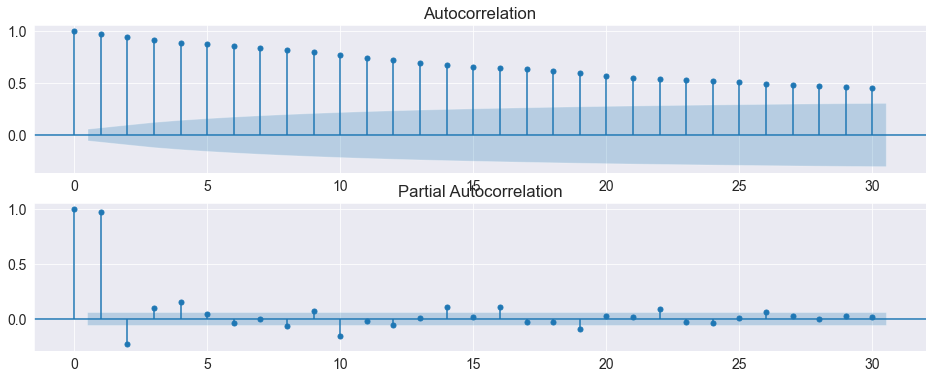

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import Series
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(default, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(default, ax=pyplot.gca(), lags = 30)
pyplot.show()


### Regression output

The ADF uses a standard regression when computing results. These can be accesses using `regression`.


In [8]:
reg_res = adf.regression
print(reg_res.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     17.83
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           1.30e-22
Time:                        14:49:46   Log-Likelihood:                 630.15
No. Observations:                1194   AIC:                            -1244.
Df Residuals:                    1186   BIC:                            -1204.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0248      0.007     -3.786      0.0

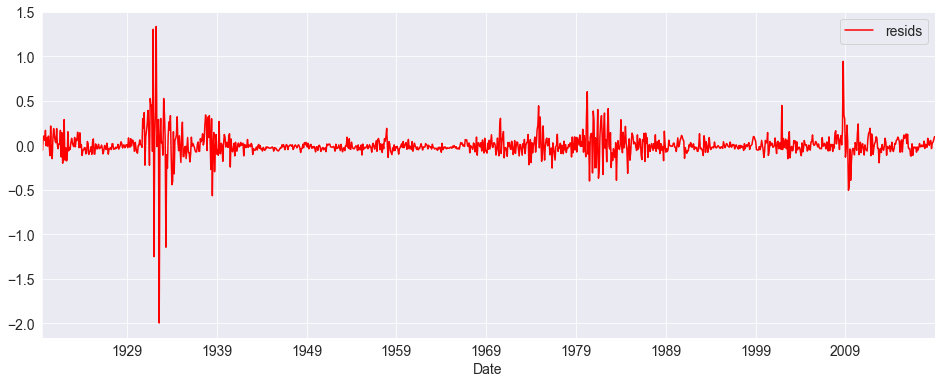

In [9]:

import matplotlib.pyplot as plt
import pandas as pd

resids = pd.DataFrame(reg_res.resid)
resids.index = default.index[6:]
resids.columns = ["resids"]
fig = resids.plot(color='red')

Since the number lags was directly set, it is good to check whether the residuals appear to be __white noise__.

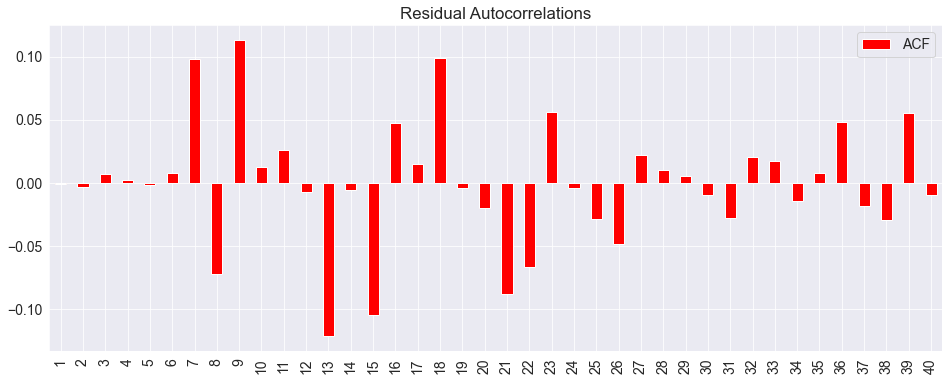

In [10]:
acf = pd.DataFrame(sm.tsa.stattools.acf(reg_res.resid), columns=["ACF"])
fig = acf[1:].plot(kind="bar", color='red',  title="Residual Autocorrelations")

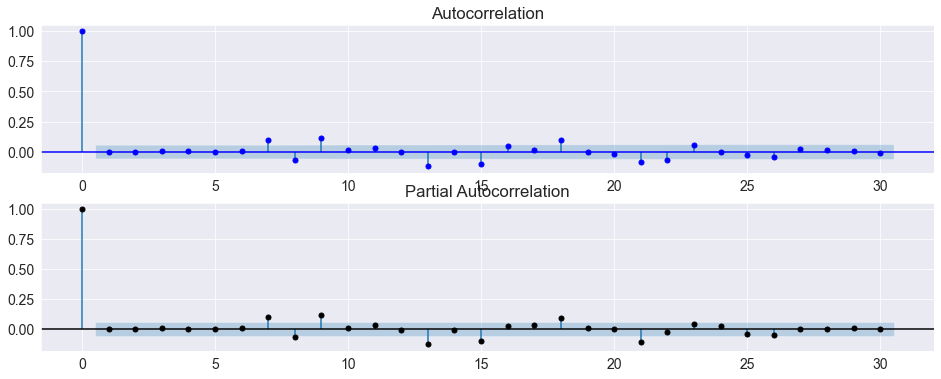

In [11]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(resids, ax=pyplot.gca(), color='blue', lags = 30)
pyplot.subplot(212)
plot_pacf(resids, ax=pyplot.gca(),color='black', lags = 30)
pyplot.show()

## Effective Unit Root Tests

Elliott, Rothenberg, \& Stock (1996) proposed two test statistics that do not require OLS estimation of coefficients of deterministic variables (such as trend and constant). The first test is based on the modification of the DF test. Based on the observation that OLS is not effective in predicting trend and constant term, ERS suggested taking the quasi-differences of the data.

The DF-GLS test statistic proposed by ERS is based on the following test regression without deterministic dental variables:

$$\Delta y_{t}=\alpha_{0} y_{t-1}^{d}+\alpha_{1} \Delta y_{t-1}^{d}+\cdots+\alpha_{p} \Delta y_{t-p}^{d}+\text { error }$$

$H_{0}: \alpha_{0} = 0$ null hypothesis is tested with the statistic DF $t$. The distribution of the DF-GLS test statistic is fixed in the model and the same as the DF test statistic if there is no trend. In other cases, asymptotic distribution is different. ERS has tabulated the critical values by approximating the asymptotic distribution with Monte Carlo methods (see ERS, 1996; p. 825, Table 1, Panel C). If the calculated test statistic is less than the critical value, the unit root null hypothesis is rejected.

The second test proposed by ERS (1996) is known as the point-optimal test. This test statistic is based on the residues obtained from the OLS regression, which is established with the quasi-difference transformed data. Let's define the residues from this regression as follows:

$$\hat{\zeta}=d\left(y_{t} \mid a\right)-\hat{\delta}^{\prime} d\left(x_{t} \mid a\right)$$

ERS point-optimal test statistic:

$$P_{T}=\frac{S S R(\bar{a})-\bar{a} S S R(1)}{\lambda_{0}}$$

Here SSR is the sum of residual squares (e.g., $\operatorname{SSR} (\bar{a}) = \hat{\zeta} (\bar{a})$) and $\lambda_{0}$ long-term variance. Critical values were found by ERS through simulations (see ERS, p. 825, Table $1,$ Panel $\mathrm{A}$ and $\mathrm{B}$).


## <center>Dickey-Fuller GLS Testing

The Dickey-Fuller GLS test is an improved version of the ADF which uses a GLS-detrending regression before running an ADF regression with no additional deterministic terms. This test is only available with a constant or constant and time trend (trend='c' or trend='ct').

The results of this test agree with the ADF results.


In [12]:
from arch.unitroot import DFGLS

dgfls= DFGLS(default)
print(dgfls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -2.322
P-value                         0.020
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: -2.59 (1%), -1.96 (5%), -1.64 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.




The trend can be altered using `trend`. The conclusion is the same.

In [13]:


dfgls = DFGLS(default, trend="ct")
print(dfgls.summary().as_text())



      Dickey-Fuller GLS Results      
Test Statistic                 -3.464
P-value                         0.009
Lags                               21
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.43 (1%), -2.86 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## Philips-Perron Test

Phillips \& Perron (1988) (PP) proposed a nonparametric test to correct possible autocorrelation in the inheritance in test regression. Consider the OLS estimation of the AR (1) process below:

$$y_{t}=\phi_{0}+\phi_{1} y_{t-1}+u_{t}$$

PP allows $u_{t} $ to be autocorrelated. PP test aims to eliminate the effect of this autocorrelation on DF $t$ statistic $\mathrm{i}$. PP test statistic can be written as follows:

$$\tau_{P P}=t_{\phi}\left(\frac{\gamma_{0}}{\lambda^{2}}\right)^{1 / 2}-\frac{1}{2}\left(\frac{\left(\lambda^{2}-\gamma_{0}\right) T \sigma_{\phi}}{\lambda s}\right)$$

Here, $t_{\phi}$,  $t$ statistic found from the OLS regression of the $H_{0}: \phi_{1} = 1$ hypothesis. $\gamma_{0}$ is the error variance, $\lambda^{2}$ is the long-term variance of the error term. $\sigma_{\phi}$ is the standard error of $\phi_{1}$ and the standard error of $s$ OLS test regression. These sizes can be estimated consistently with the help of standard formulas. If we call the errors from OLS regression as $\hat{u}_{t}$:

$$\hat{\gamma}_{0}=\frac{1}{T} \sum_{t=1}^{T} \hat{u}_{t}^{2}$$

and


$$s^{2}=\frac{1}{T-k} \sum_{t=1}^{T} \hat{u}_{t}^{2}$$

Where $k$ is the number of explanatory variables in the test regression.


## <center> Phillips-Perron Testing

The Phillips-Perron test is similar to the ADF except that the regression run does not include lagged values of the first differences. Instead, the PP test fixed the t-statistic using a long run variance estimation, implemented using a Newey-West covariance estimator.

By default, the number of lags is automatically set, although this can be overridden using `lags`.


In [14]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(default)
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.898
P-value                         0.002
Lags                               23
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [15]:
pp = PhillipsPerron(default, lags=12)
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.024
P-value                         0.001
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [16]:
pp = PhillipsPerron(default, trend="ct", lags=12)
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.262
P-value                         0.004
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



Finally, the PP testing framework includes two types of tests. 
- One which uses an ADF-type regression of the first difference on the level, 
- the other which regresses the level on the level. 

The default is the tau test, which is similar to an ADF regression, although this can be changed using `test_type='rho'`.


In [17]:
pp = PhillipsPerron(default, test_type="rho", trend="ct", lags=12)
print(pp.summary().as_text())

     Phillips-Perron Test (Z-rho)    
Test Statistic                -36.114
P-value                         0.002
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.16 (1%), -21.60 (5%), -18.17 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## KPSS Test

Kwiatkowsky et al. (1992) (KPSS) proposed a test where the null hypothesis is stationary around a trend of the series, and the difference is stationary for the alternative hypothesis. In the classical test approach, if there is strong evidence against non-stationarity (unit root), the null hypothesis is rejected. According to KPSS, one reason why the unit root hypothesis cannot be rejected, especially for parameter values very close to 1, is that economic time series do not contain enough information about whether or not they are unit roots. He proposed testing the KPSS (trend) -stationary null hypothesis as a way of increasing power for value alternatives close to the unit root. KPSS assumes that the series can be separated as follows:

$$y_{t}=c_{t}+\delta t+\varepsilon_{t}, \quad u_{t} \sim \operatorname{iid}\left(0, \sigma_{\varepsilon}^{2}\right)$$

here,

$$c_{t}=c_{t-1}+u_{t}, \quad u_{t} \sim \text { iid }\left(0, \sigma_{u}^{2}\right)$$

and $c_{0}$ is a fixed number. The series consists of a trend component, a random walk component and a stationary error component. Under the null hypothesis $\sigma_{u}^{2} = 0, c_{t} = c_{0}$ and $y_{t}$ will be stable around a trend. Alternatively, if $\delta = 0$, $y_{t}$ will be stationary around a constant.

## <center> KPSS Testing

The KPSS test differs from the three previous in that the null is a stationary process and the alternative is a unit root.

Note that here the null is rejected which indicates that the series might be a unit root.


In [18]:
from arch.unitroot import KPSS

kpss = KPSS(default)
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  1.088
P-value                         0.002
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.



Changing the trend does not alter the conclusion.


In [19]:

kpss = KPSS(default, trend="ct")
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.393
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


## Zivot-Andrews Test

Although Perron's general framework is followed in Zivot and Andrews (1992) (ZA) endogen structural break test, the null hypothesis is the same for all three models. Under the null hypothesis, the model can be written as follows:

$$y_{t}=\mu+y_{t-1}+\varepsilon_{t}$$

Test regressions, Model A:

$$y_{t}=\mu^{A}+\theta^{A} D U_{t}(\lambda)+\beta^{A} t+\alpha^{A} y_{t-1}+\sum_{j=1}^{k} \delta_{j}^{A} \Delta y_{t-j}+\varepsilon_{t}$$

$$
D U_{t}(\lambda)=\left\{\begin{array}{ll}
1, & t>T \lambda \text { ise } \\
0, & \text { değilse }
\end{array}\right.
$$

Model B:

$$y_{t}=\mu^{B}+\beta^{B} t+\gamma^{B} D T_{t}+\alpha^{B} y_{t-1}+\sum_{j=1}^{k} \delta_{j}^{B} \Delta y_{t-j}+\varepsilon_{t}$$

$$
D T_{t}(\lambda)=\left\{\begin{array}{ll}
t-T \lambda, & t>T \lambda \text { ise } ; \\
0, & \text { değilse. }
\end{array}\right.
$$

Model C:

$$y_{t}=\mu^{C}+\theta^{C} D U_{t}(\lambda)+\beta^{C} t+\gamma^{C} D T_{t}(\lambda)+\alpha^{C} y_{t-1}+\sum_{j=1}^{k} \delta_{j}^{C} \Delta y_{t-j}+\varepsilon_{t}$$

For ZA test values such as \[0.1,0.9\] or \[0.15,0.85\] $\lambda = \left[\lambda_{1}, \lambda_{2} \right]$, estimating the appropriate one of these models and it is based on calculating the coefficient $y_{t-1}$ for each $\lambda_{j}$ of $t$ test. This DF $t$ is used to infer the smallest statistics. Also, the min $t$ statistic will determine the breakpoint internally. In the ZA test, each $t$ is considered as a potential break point and separate test regression is estimated for each point. The critical values of the ZA min $t$ statistic depend on which of the above specifications is chosen and the $\lambda$ value. It is larger in absolute value than the standard ADF critical values.

## <center> Zivot-Andrews Test

The Zivot-Andrews test allows the possibility of a single structural break in the series. Here we test the default using the test.

In [20]:
from arch.unitroot import ZivotAndrews

za = ZivotAndrews(default)
print(za.summary().as_text())

        Zivot-Andrews Results        
Test Statistic                 -4.900
P-value                         0.040
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.


In [21]:
from arch.unitroot import ZivotAndrews

za = ZivotAndrews(default, trend = 'ct', max_lags=5)
print(za.summary().as_text())

        Zivot-Andrews Results        
Test Statistic                 -5.118
P-value                         0.045
Lags                                5
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -5.58 (1%), -5.07 (5%), -4.83 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.


In [22]:
### Seconde methode of testing ADF from statmodels package

In [23]:
from statsmodels.tsa.stattools import adfuller, zivot_andrews, kpss

In [24]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(default, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -3.356156
p-value                           0.012547
#Lags Used                       21.000000
Number of Observations Used    1178.000000
Critical Value (1%)              -3.435913
Critical Value (5%)              -2.863997
Critical Value (10%)             -2.568078
dtype: float64


In [25]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(default, maxlag=5, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -3.582165
p-value                           0.006111
#Lags Used                        5.000000
Number of Observations Used    1194.000000
Critical Value (1%)              -3.435839
Critical Value (5%)              -2.863964
Critical Value (10%)             -2.568060
dtype: float64


In [26]:
print ('*'*30)
print ('Results of Dickey-Fuller Test:')
print ('*'*30)
dftest = adfuller(default, maxlag=5, regression='ct', autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

******************************
Results of Dickey-Fuller Test:
******************************
Test Statistic                   -3.785644
p-value                           0.017302
#Lags Used                        5.000000
Number of Observations Used    1194.000000
Critical Value (1%)              -3.966372
Critical Value (5%)              -3.414173
Critical Value (10%)             -3.129218
dtype: float64


In [27]:
#Perform Zivot Andrews test:
print ('*'*30)
print ('Results of Zivot Andrews Test:')
print ('*'*30)
ZAtest = zivot_andrews(default, maxlag=5, regression='c', autolag='AIC')
indices = [0, 1, 3, 4]
selected_elements = [ZAtest[indx] for indx in indices]
ZAoutput = pd.Series(selected_elements, index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in ZAtest[2].items(): 
    ZAoutput['Critical Value (%s)'%key] = value
print(ZAoutput)

******************************
Results of Zivot Andrews Test:
******************************
Test Statistic                  -5.000988
p-value                          0.028638
#Lags Used                       5.000000
Number of Observations Used    233.000000
Critical Value (1%)             -5.276440
Critical Value (5%)             -4.810670
Critical Value (10%)            -4.566180
dtype: float64


In [28]:
#Perform Zivot Andrews test:
print ('*'*30)
print ('Results of Zivot Andrews Test:')
print ('*'*30)
ZAtest = zivot_andrews(default, maxlag=5, regression='ct', autolag='AIC')
indices = [0, 1, 3, 4]
selected_elements = [ZAtest[indx] for indx in indices]
ZAoutput = pd.Series(selected_elements, index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in ZAtest[2].items(): 
    ZAoutput['Critical Value (%s)'%key] = value
print(ZAoutput)

******************************
Results of Zivot Andrews Test:
******************************
Test Statistic                  -5.118010
p-value                          0.045006
#Lags Used                       5.000000
Number of Observations Used    233.000000
Critical Value (1%)             -5.575560
Critical Value (5%)             -5.073320
Critical Value (10%)            -4.826680
dtype: float64


In [29]:
from statsmodels.tsa.stattools import kpss

In [30]:
# perform Kpss test: 
print('*'*30)
print('Results of KPSS Test:')
print('*'*30)
kpssTest= kpss(default, nlags=20 ,regression='c')
kpssOutput=pd.Series(kpssTest[0:3], index=['Test Statistic','p-value','#Lags Used'])
for key, value in kpssTest[3].items():
    kpssOutput['Critical Value (%s)'%key] = value
print(kpssOutput)

******************************
Results of KPSS Test:
******************************
Test Statistic            1.087536
p-value                   0.010000
#Lags Used               20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## <center> Variance Ratio Testing

Variance ratio tests are not usually used as unit root tests, and are instead used for testing whether a financial return series is a pure random walk versus having some predictability. This example uses the excess return on the market from Ken French's data.


In [31]:
import arch.data.frenchdata
import numpy as np
import pandas as pd

ff = arch.data.frenchdata.load()
excess_market = ff.iloc[:, 0]  # Excess Market
print(ff.describe().T)

         count      mean       std    min   25%   50%   75%    max
Mkt-RF  1109.0  0.659946  5.327524 -29.13 -1.97  1.02  3.61  38.85
SMB     1109.0  0.206555  3.191132 -16.87 -1.56  0.07  1.73  36.70
HML     1109.0  0.368864  3.482352 -13.28 -1.32  0.14  1.74  35.46
RF      1109.0  0.274220  0.253377  -0.06  0.03  0.23  0.43   1.35



The variance ratio compares the variance of a 1-period return to that of a multi-period return. The comparison length has to be set when initializing the test.

This example compares 1-month to 12-month returns, and the null that the series is a pure random walk is rejected. Negative values indicate some positive autocorrelation in the returns (momentum).


In [32]:
from arch.unitroot import VarianceRatio

vr = VarianceRatio(excess_market, 12)
print(vr.summary().as_text())

     Variance-Ratio Test Results     
Test Statistic                 -5.029
P-value                         0.000
Lags                               12
-------------------------------------

Computed with overlapping blocks (de-biased)


By default the VR test uses all overlapping blocks to estimate the variance of the long period's return. This can be changed by setting `overlap=False`. This lowers the power but does not change the conclusion.

In [33]:
warnings.simplefilter("always")  # Restore warnings

vr = VarianceRatio(excess_market, 12, overlap=False)
print(vr.summary().as_text())

     Variance-Ratio Test Results     
Test Statistic                 -6.206
P-value                         0.000
Lags                               12
-------------------------------------

Computed with non-overlapping blocks


C:\ProgramData\Anaconda3\lib\site-packages\arch\unitroot\unitroot.py:1677: InvalidLengthWarning: 
The length of y is not an exact multiple of 12, and so the final
4 observations have been dropped.

  warnings.warn(


__Note__: The warning is intentional. It appears here since when it is not possible to use all data since the data length is not an integer multiple of the long period when using non-overlapping blocks. There is little reason to use `overlap=False`.

###  you can the data below to run the codes

In [34]:
from arch.unitroot import ADF
import numpy as np
import statsmodels.api as sm
data = sm.datasets.macrodata.load().data
inflation = np.diff(np.log(data["cpi"]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
